In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from ase.io import read
from ovito.io import import_file, export_file
from ovito.modifiers import CoordinationAnalysisModifier
from ovito.pipeline import StaticSource, Pipeline
from ovito.io.ase import ase_to_ovito

from scf.get_lattice_info import QELattice
from constants.constants import get_silicon_all_scf_data, get_silicon_all_scf_data_sd

In [2]:
import glob

# def add_structure_path(path, all_dirs):
#     dirs = glob.glob(f'{path}/*')
#     for d in dirs:
#         scf_dirs = glob.glob(f'{d}/result/scf*')
#         if len(scf_dirs) == 0:
#             continue
#         for scf_d in scf_dirs:
#             all_dirs.append(scf_d)

# # path = '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/coord/sd'
# path = '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-571520/coord' 
# all_dirs = []
# add_structure_path(path, all_dirs)

In [3]:
all_dirs = [d for d in get_silicon_all_scf_data_sd() if 'mp-slab' in d]

In [4]:
def calc_rdf(path2scf, rcut, bins):
    structure = read(os.path.join(path2scf, 'scf.in'), format='espresso-in')
    print(structure.symbols)
    pipeline = Pipeline(source = StaticSource(data=ase_to_ovito(structure)))
    modifier = CoordinationAnalysisModifier(cutoff=rcut, number_of_bins=bins, partial=True)
    pipeline.modifiers.append(modifier)
    rdf_table = pipeline.compute().tables['coordination-rdf']

    return rdf_table.xy()

In [5]:
rcut = 5
bins = 100

rdf_val_list = []
# all_dirs = get_silicon_all_scf_data_sd()

# with open('/Users/y1u0d2/desktop/Lab/result/n2p2/Si/91/data/dirs.txt',mode='r') as f:
#     all_dirs = [s.strip() for s in f.readlines()]
#     all_dirs = list(filter(lambda x: 'dimer' not in x, all_dirs))

for path2scf in all_dirs:
    try:
        rdf_table = calc_rdf(path2scf, rcut, bins)
        rdf_val_list.append(rdf_table[:, 1])
    except:
        print(path2scf)
        continue
    break

Si56


1   HIToolbox                           0x00007ff816b7a726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff816b7a2b8 _ZN15MenuBarInstance14EnableAutoShowEv + 52
3   HIToolbox                           0x00007ff816b1e908 SetMenuBarObscured + 408
4   HIToolbox                           0x00007ff816b1e4ca _ZN13HIApplication15HandleActivatedEP14OpaqueEventRefhP15OpaqueWindowPtrh + 164
5   HIToolbox                           0x00007ff816b18996 _ZN13HIApplication13EventObserverEjP14OpaqueEventRefPv + 252
6   HIToolbox                           0x00007ff816ae0bd2 _NotifyEventLoopObservers + 153
7   HIToolbox                           0x00007ff816b183e6 AcquireEventFromQueue + 494
8   HIToolbox                           0x00007ff816b073ec ReceiveNextEventCommon + 285
9   HIToolbox                           0x00007ff816b072b3 _BlockUntilNextEventMatchingListInModeWithFilter + 70
10  AppKit                              0x00007ff81030ef33 _DPS

In [12]:
rdf_val_list = np.array(rdf_val_list)

(0.0, 6.0155659163717345)

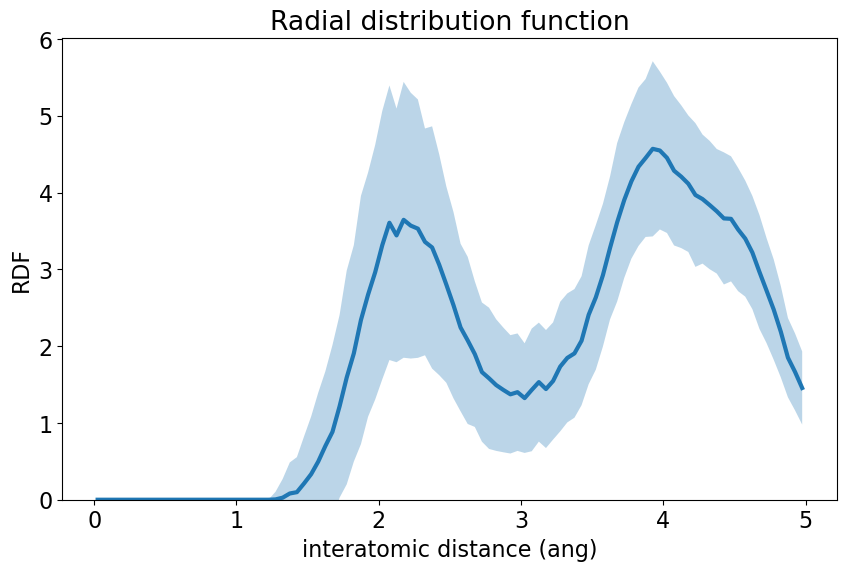

In [13]:
rdf_mean = np.mean(rdf_val_list, axis=0)
rdf_std = np.std(rdf_val_list, axis=0)
linspace = rdf_table[:, 0]

fig = plt.figure(figsize=(10,6))
plt.rcParams['font.size'] = '16'
ax = fig.add_subplot(111)
ax.set_title('Radial distribution function')
ax.set_xlabel('interatomic distance (ang)')
ax.set_ylabel('RDF')

ax.plot(linspace, rdf_mean, lw=3)
ax.fill_between(linspace, rdf_mean+rdf_std, rdf_mean-rdf_std, alpha=0.3)
ax.set_ylim(0, )

In [10]:
from create_input.get_filtered_structure_data import get_filtered_structure_path_by_force
# all_dirs = get_silicon_all_scf_data()
all_dirs = get_filtered_structure_path_by_force(force_threshold=50)

{'mp-165': 370, 'mp-16220': 1231, 'mp-149_dimer': 18, 'mp-10649': 134, 'mp-149': 1402, 'mp-168': 47, 'mp-1056579': 92}
3298 structures were removed


In [11]:
mpid_list = set([list(filter(lambda x: 'mp-' in x, d.split('/')))[0] for d in all_dirs])

/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_69737/1535918238.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-149/JXYvinVsqTfyR
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-149/CQ7oyiT0EID
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-149/3M9hKL9lMjasYBwLEgI
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-149/riFgwASKsR
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-149/C2GQJC4LVmZt
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-149/22KEaM2BU9oE9k3DI
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-149/L3bccE9xssliRnYwsbGZ
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-149/3FZYGvVjQUJf864hmht
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-149/AQA20svBTVLpa5KRbZ
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-149/MKwOY9JN5MocAE5y
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-149/glFxF3nUInoW
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-149/DwbVUEXmuRAsvj3N
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-149/LHKfdHoymoM
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-149/oOXDcEclbV8VU8k4La
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-149/yShQBsUh3HEk8zzT8k1
/Users/y1u0d2/deskt

2022-10-04 22:47:16.963 python[69737:1137205] _TIPropertyValueIsValid called with 4 on nil context!
2022-10-04 22:47:16.963 python[69737:1137205] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2022-10-04 22:47:16.963 python[69737:1137205] Text input context does not respond to _valueForTIProperty:
2022-10-04 22:47:16.969 python[69737:1137205] _TIPropertyValueIsValid called with 4 on nil context!
2022-10-04 22:47:16.969 python[69737:1137205] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2022-10-04 22:47:16.969 python[69737:1137205] Text input context does not respond to _valueForTIProperty:


/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-16220/Mvs5eVhHu6TBBC
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-16220/xyZZ1tMqQRtBHAPa7Sv
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-16220/Mqfvql76Ea
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-16220/8FhtX2eG78Em46jBiN
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-16220/LUySCEXHm0TcN3
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-16220/n6rQG1TC0mOkYifGBngw
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-16220/cr6uY8etKm7pkRQu
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-16220/uC40JDGSghBszJQuH
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-16220/6s6WDTyXEMyWJO
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-16220/h3ePi8WXKNxTb6jbbA
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-16220/Sceyyz89D4c0Y4XofwA
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-16220/KyARgxMeG5dqfv
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-16220/10r6zEmaLJhIG48w
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-16220/ncC2KrF6o0q1U
/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-16220

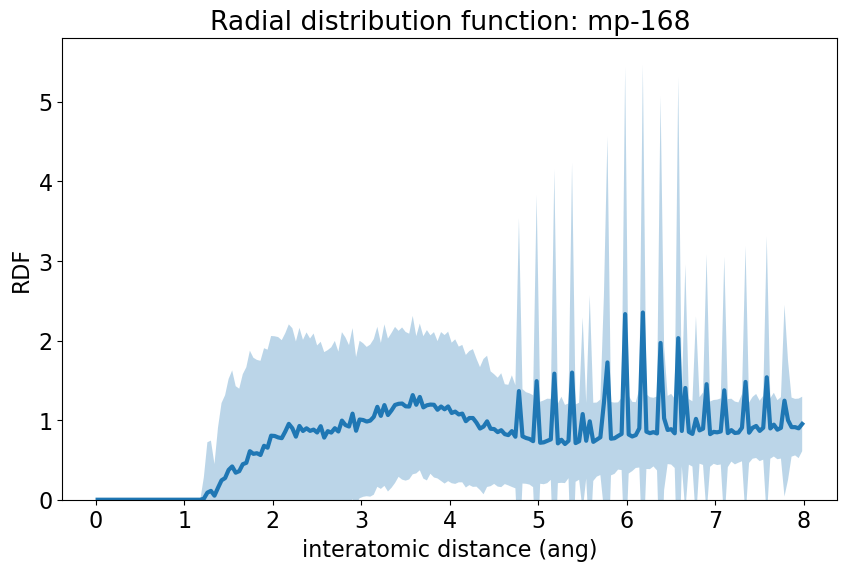

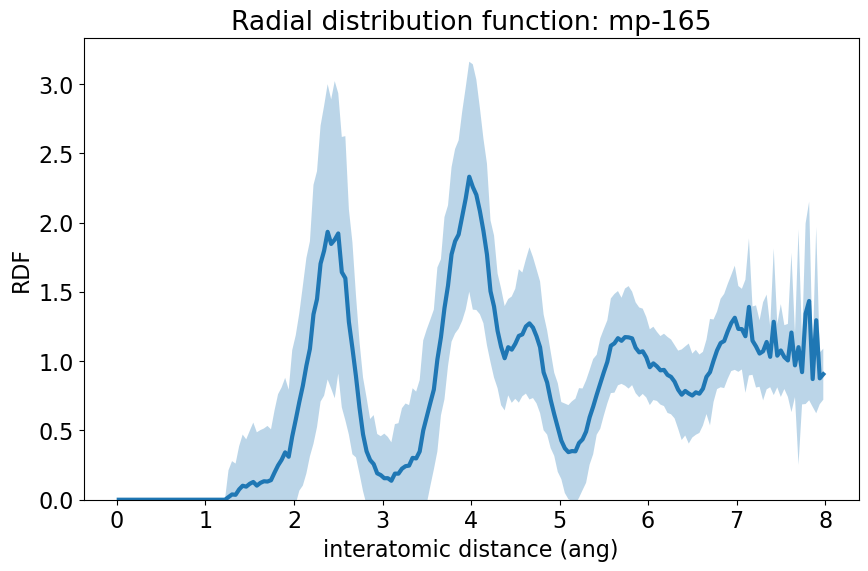

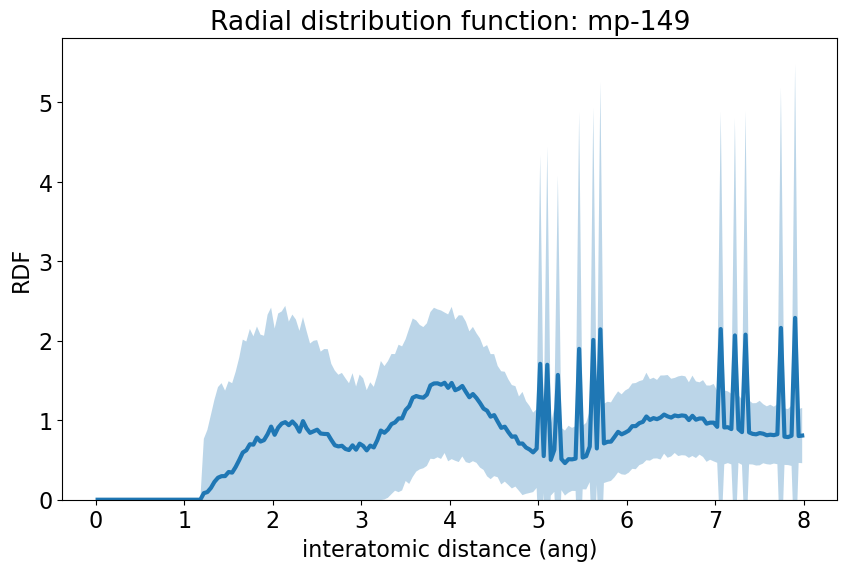

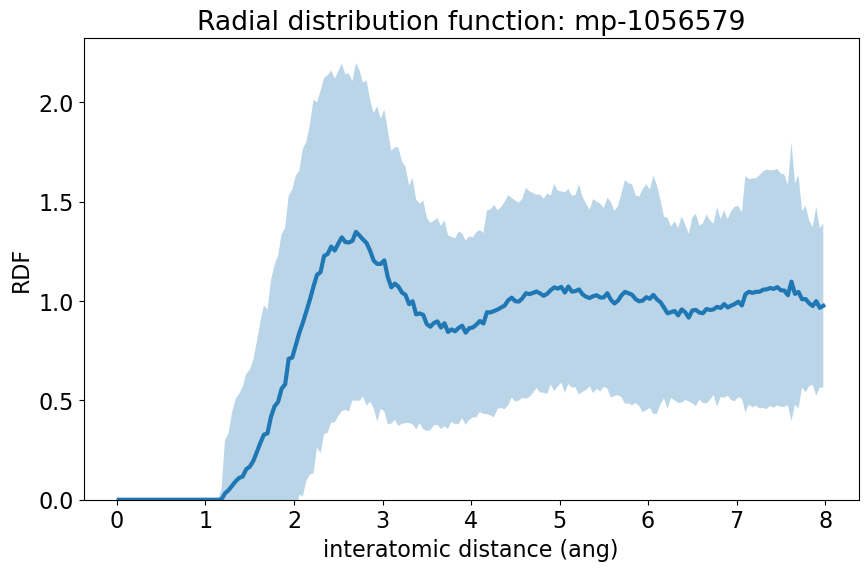

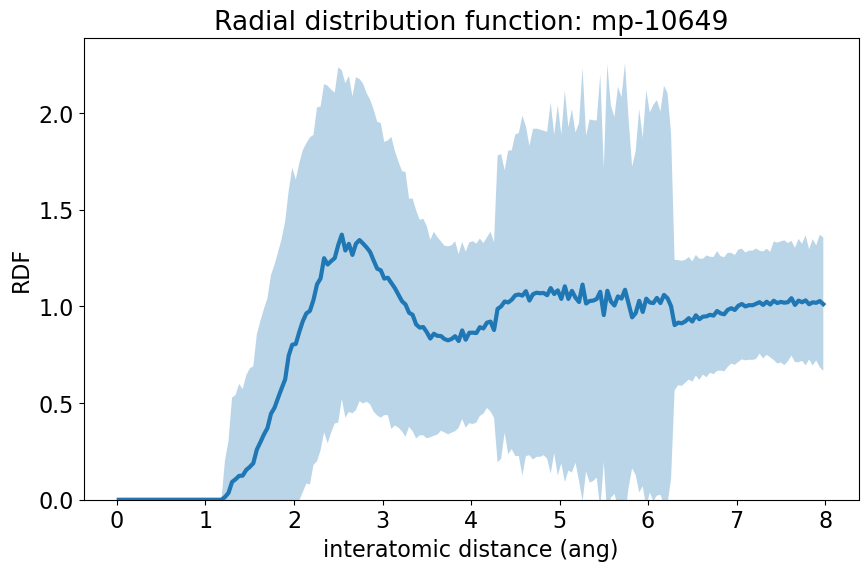

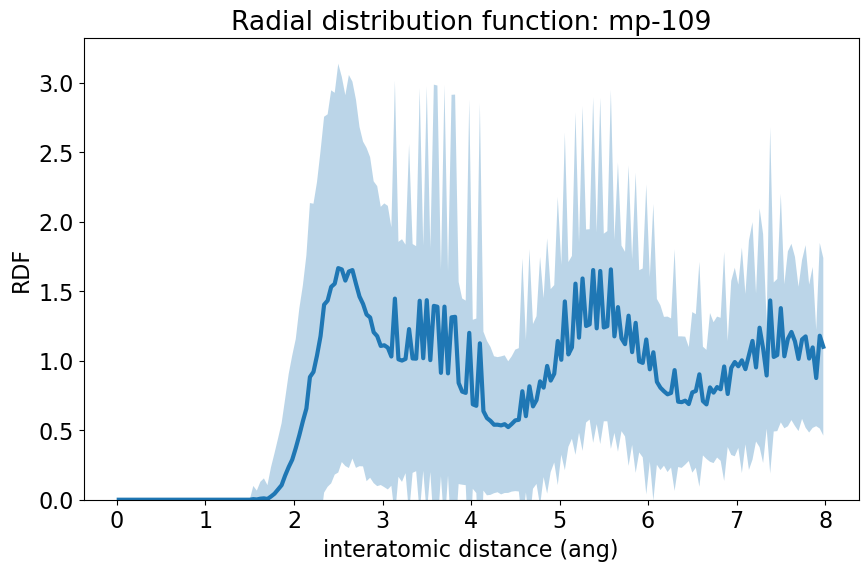

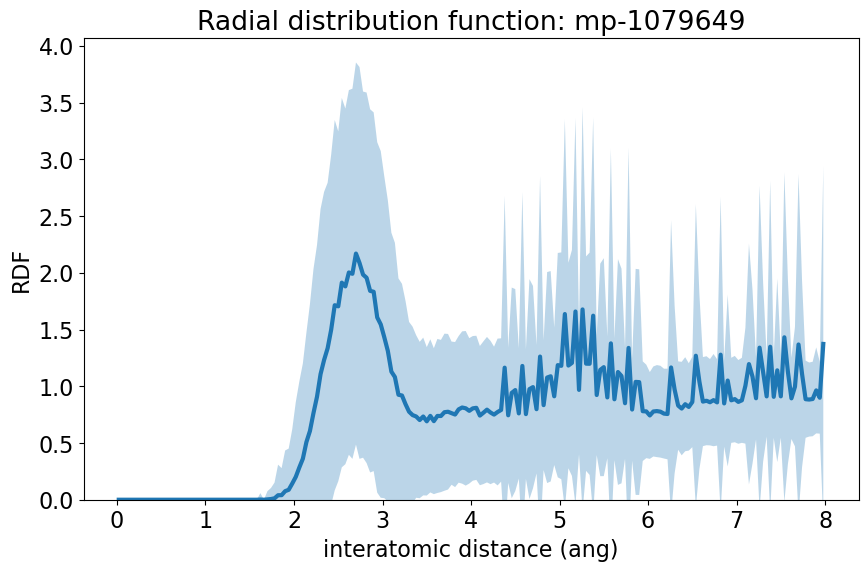

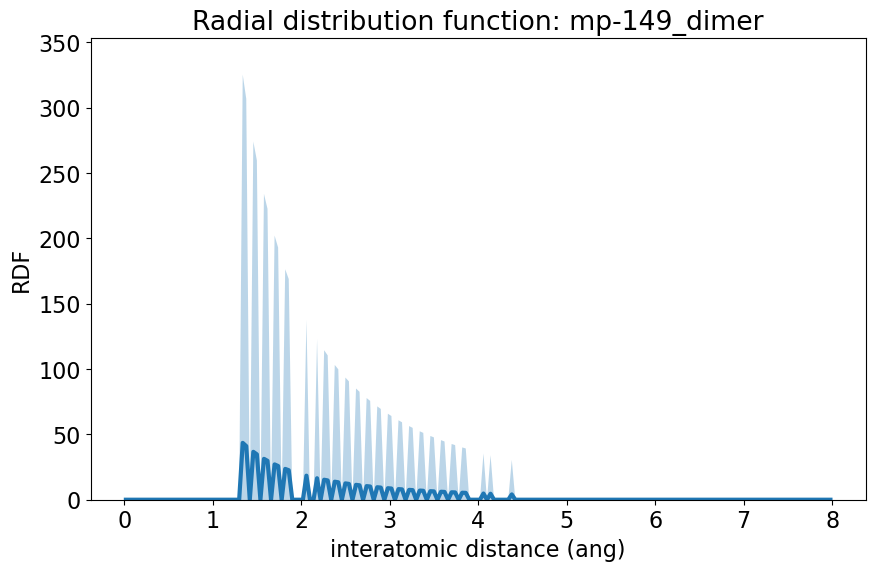

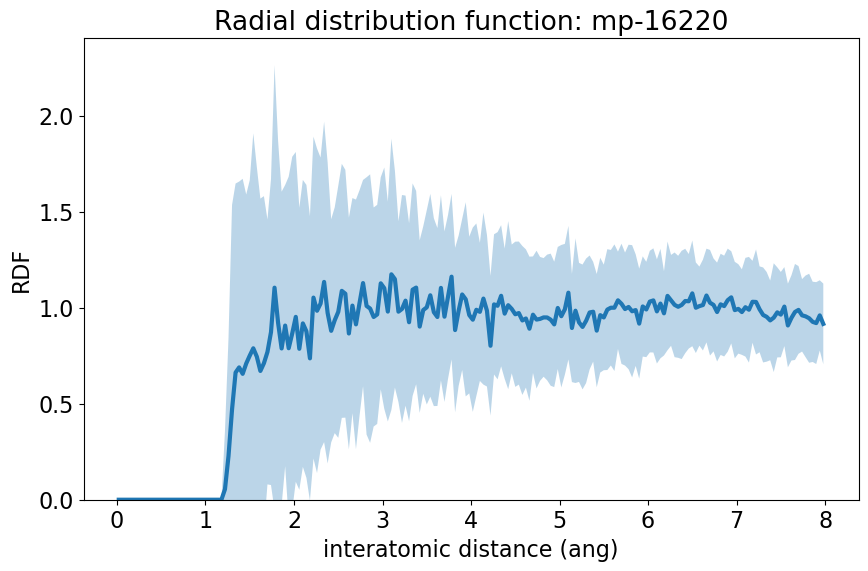

In [12]:
for mpid in list(mpid_list):
    dirs = filter(lambda x: f'/{mpid}/' in x, all_dirs)
    rdf_val_list = []
    for path2scf in dirs:
        try:
            rdf_table = calc_rdf(path2scf, rcut, bins)
            rdf_val_list.append(rdf_table[:, 1])
        except:
            print(path2scf)
            continue
    rdf_val_list = np.array(rdf_val_list)

    rdf_mean = np.mean(rdf_val_list, axis=0)
    rdf_std = np.std(rdf_val_list, axis=0)
    linspace = rdf_table[:, 0]

    fig = plt.figure(figsize=(10,6))
    plt.rcParams['font.size'] = '16'
    ax = fig.add_subplot(111)
    ax.set_title(f'Radial distribution function: {mpid}')
    ax.set_xlabel('interatomic distance (ang)')
    ax.set_ylabel('RDF')

    ax.plot(linspace, rdf_mean, lw=3)
    ax.fill_between(linspace, rdf_mean+rdf_std, rdf_mean-rdf_std, alpha=0.3)
    ax.set_ylim(0, )
    fig.show()

In [2]:
from ovito.modifiers import CoordinationAnalysisModifier, TimeAveragingModifier

# path2dump = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/atom6750/model07/0deg_100eV'
path2dump = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/tersoff/atom6750/sample_for_minimum_distance/0deg_1000eV'

pipeline = import_file(os.path.join(path2dump, 'dump.lammpstrj'))

# Insert the RDF calculation modifier into the pipeline:
pipeline.modifiers.append(CoordinationAnalysisModifier(cutoff = 5.0, number_of_bins = 200))

# Insert the time-averaging modifier into the pipeline, which accumulates
# the instantaneous DataTable produced by the previous modifier and computes a mean histogram.
pipeline.modifiers.append(TimeAveragingModifier(operate_on='table:coordination-rdf'))

# Data export method 1: Convert to NumPy array and write data to a text file:
total_rdf = pipeline.compute().tables['coordination-rdf[average]'].xy()

2022-10-15 14:37:22.574 python[15847:1048707] _TIPropertyValueIsValid called with 4 on nil context!
2022-10-15 14:37:22.574 python[15847:1048707] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2022-10-15 14:37:22.574 python[15847:1048707] Text input context does not respond to _valueForTIProperty:
2022-10-15 14:37:22.575 python[15847:1048707] _TIPropertyValueIsValid called with 4 on nil context!
2022-10-15 14:37:22.575 python[15847:1048707] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2022-10-15 14:37:22.575 python[15847:1048707] Text input context does not respond to _valueForTIProperty:


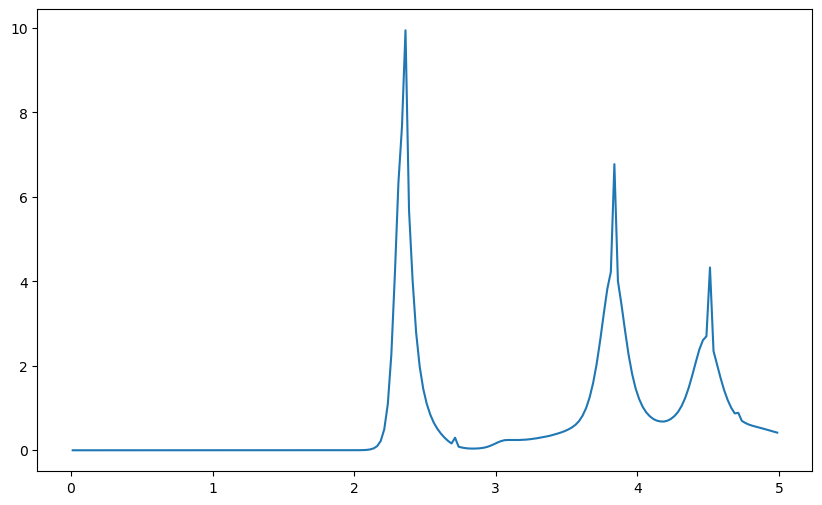

In [3]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(total_rdf[:,0], total_rdf[:, 1])

In [5]:
rdf_df = pd.DataFrame(data=total_rdf, columns=['distance', 'rdf_val'])

In [7]:
rdf_df.query('distance < 1')

,distance,rdf_val
0,0.0125,0.000000
1,0.0375,0.000000
2,0.0625,0.000000
3,0.0875,0.000000
4,0.1125,0.000000
5,0.1375,0.000000
6,0.1625,0.000000
7,0.1875,0.000000
8,0.2125,0.000000
9,0.2375,0.000000


In [9]:
from ovito.modifiers import CoordinationAnalysisModifier, TimeAveragingModifier

# path2dump = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/atom6750/model07/0deg_100eV'
path2dump = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/tersoff/atom6750/sample_for_minimum_distance/0deg_1000eV'

pipeline = import_file(os.path.join(path2dump, 'dump.lammpstrj'))

# Insert the RDF calculation modifier into the pipeline:
pipeline.modifiers.append(CoordinationAnalysisModifier(cutoff = 5.0, number_of_bins = 200))

# Insert the time-averaging modifier into the pipeline, which accumulates
# the instantaneous DataTable produced by the previous modifier and computes a mean histogram.
pipeline.modifiers.append(TimeAveragingModifier(operate_on='table:coordination-rdf'))

# Data export method 1: Convert to NumPy array and write data to a text file:
# total_rdf = pipeline.compute().tables['coordination-rdf[average]'].xy()
total_rdf = pipeline.compute().tables

In [19]:
pipeline = import_file(os.path.join(path2dump, 'dump.lammpstrj'))
pipeline.modifiers.append(CoordinationAnalysisModifier(cutoff = 5.0, number_of_bins = 200))

rdf_val_list = []

for frame_index in range(pipeline.source.num_frames):
    rdf_table = pipeline.compute(frame_index).tables['coordination-rdf'].xy()
    rdf_val_list.append(rdf_table[:, 1])

In [21]:
rdf_val_list = np.array(rdf_val_list)

In [22]:
rdf_sum = np.sum(rdf_val_list, axis=0)
rdf_mean = np.mean(rdf_val_list, axis=0)
rdf_std = np.std(rdf_val_list, axis=0)
linspace = rdf_table[:, 0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.65704798e-02,
       8.67200810e-02, 4.04704783e-02, 0.00000000e+00, 0.00000000e+00,
       3.33444048e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.64369324e-02, 0.00000000e+00, 0.00000000e+00, 4.51477969e-02,
       0.00000000e+00, 2.04506326e-02, 1.16997696e-01, 5.58402777e-02,
       3.55726035e-02, 0.00000000e+00, 8.14462916e-02, 1.56106395e-02,
       5.98942433e-02, 1.00622899e-01, 8.28663590e-02, 3.98397959e-02,
       8.94520415e-02, 7.38337618e-02, 1.30440198e-01, 8.00431697e-02,
      

/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_15847/4185674335.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


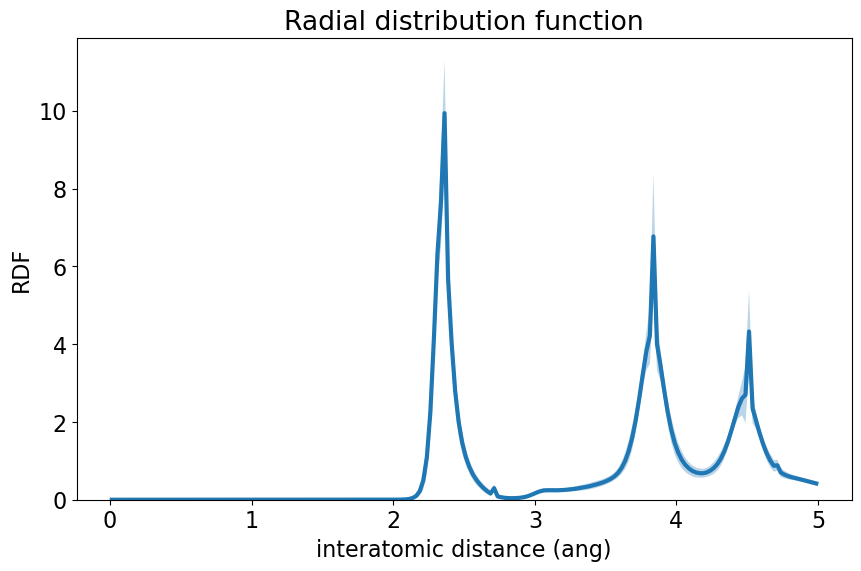

In [37]:
path2save = '/Users/y1u0d2/desktop/Lab/result/rdf/Si/sputtering'

fig = plt.figure(figsize=(10,6))
plt.rcParams['font.size'] = '16'
ax = fig.add_subplot(111)
ax.set_title(f'Radial distribution function')
ax.set_xlabel('interatomic distance (ang)')
ax.set_ylabel('RDF')

ax.plot(linspace, rdf_mean, lw=3)
ax.fill_between(linspace, rdf_mean+rdf_std, rdf_mean-rdf_std, alpha=0.3)
ax.set_ylim(0, )
fig.show()
fig.savefig(os.path.join(path2save, 'rdf.png'))

In [31]:
rdf_val_df = pd.DataFrame(data=np.vstack((linspace,rdf_sum, rdf_mean, rdf_std)).T, columns=['distance', 'rdf_sum', 'rdf_mean', 'rdf_std'])

In [36]:
path2save = '/Users/y1u0d2/desktop/Lab/result/rdf/Si/sputtering'
rdf_val_df.to_csv(os.path.join(path2save, 'rdf_val.csv'), index=False)